In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv('./sign_mnist_train.csv')
test = pd.read_csv('./sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
print (train.shape)
print (test.shape)

(27455, 785)
(7172, 785)


In [4]:
labels = train['label'].values
unique_val = np.array(labels)
unique_labels = np.unique(unique_val)

In [5]:
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

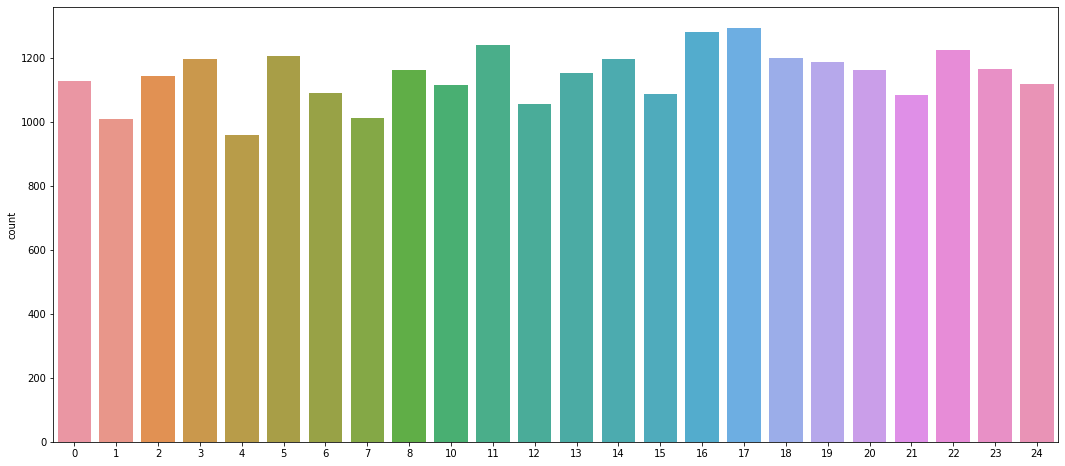

In [6]:
plt.figure(figsize = (18,8))
sns.countplot(x=labels);

In [7]:
train.values

array([[  3, 107, 118, ..., 204, 203, 202],
       [  6, 155, 157, ..., 103, 135, 149],
       [  2, 187, 188, ..., 195, 194, 195],
       ...,
       [ 18, 174, 174, ..., 202, 200, 200],
       [ 17, 177, 181, ...,  64,  87,  93],
       [ 23, 179, 180, ..., 205, 209, 215]])

In [8]:
# drop column label
train_without_label = train.drop("label", axis=1)
train_without_label.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [9]:
images = train_without_label.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images

array([[[107, 118, 127, ..., 170, 170, 169],
        [111, 121, 129, ..., 171, 171, 170],
        [113, 123, 131, ..., 171, 171, 171],
        ...,
        [142, 150, 159, ..., 202, 201, 200],
        [142, 151, 160, ..., 204, 203, 202],
        [142, 151, 160, ..., 204, 203, 202]],

       [[155, 157, 156, ..., 138,  92, 108],
        [158, 159, 159, ..., 142, 116, 143],
        [161, 161, 161, ..., 147, 125, 140],
        ...,
        [162, 159, 145, ...,  91, 101,  94],
        [153, 139, 115, ...,  97,  95, 120],
        [135, 116,  95, ..., 103, 135, 149]],

       [[187, 188, 188, ...,  66,  77,  83],
        [188, 189, 189, ...,  73,  73,  71],
        [190, 190, 190, ...,  74,  68,  61],
        ...,
        [212, 198, 175, ..., 195, 193, 192],
        [202, 179, 152, ..., 195, 194, 193],
        [198, 166, 132, ..., 195, 194, 195]],

       ...,

       [[174, 174, 174, ..., 160, 158, 156],
        [178, 178, 177, ..., 162, 160, 158],
        [181, 180, 180, ..., 164, 162, 161

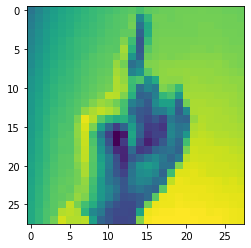

In [10]:
plt.imshow(images[0])

In [31]:
# Convert labels to binary 
from sklearn.preprocessing import LabelBinarizer
labels = LabelBinarizer().fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [33]:
# Build model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [34]:
# Config model hyperparameter
batch_size = 128
num_classes = 24
epochs = 50

In [35]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [37]:
X_train.shape

(19218, 28, 28, 1)

In [38]:
# CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=batch_size)

W0708 10:45:07.817817 140199431653184 deprecation.py:323] From /home/duyvc/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 23s 1ms/step - loss: 2.5720 - acc: 0.2420 - val_loss: 1.2931 - val_acc: 0.5570
Epoch 2/50
19218/19218 [==============================] - 27s 1ms/step - loss: 0.8981 - acc: 0.6922 - val_loss: 0.4802 - val_acc: 0.8299
Epoch 3/50
19218/19218 [==============================] - 29s 2ms/step - loss: 0.3366 - acc: 0.8877 - val_loss: 0.1498 - val_acc: 0.9610
Epoch 4/50
19218/19218 [==============================] - 30s 2ms/step - loss: 0.1364 - acc: 0.9557 - val_loss: 0.0695 - val_acc: 0.9791
Epoch 5/50
19218/19218 [==============================] - 25s 1ms/step - loss: 0.0701 - acc: 0.9797 - val_loss: 0.0276 - val_acc: 0.9953
Epoch 6/50
19218/19218 [==============================] - 23s 1ms/step - loss: 0.0446 - acc: 0.9865 - val_loss: 0.0086 - val_acc: 0.9987
Epoch 7/50
19218/19218 [==============================] - 24s 1ms/step - loss: 0.0226 - acc: 0.9943 - val_loss: 0.0092 - val_acc:

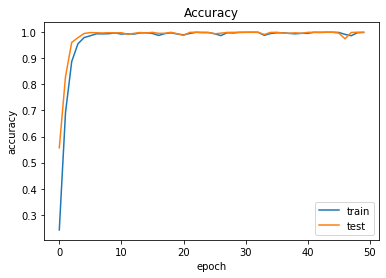

In [95]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [96]:
# test model
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in images])

In [97]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [98]:
# get test labels
test_labels = test['label'].values
test_labels =  LabelBinarizer().fit_transform(test_labels)

# drop column label
test_without_label = test.drop("label", axis=1)
test_images = test_without_label.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images.shape

(7172, 28, 28)

In [100]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [103]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_images)
print (y_pred.round())
accuracy_score(test_labels, y_pred.round())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


0.9266592303402119

In [104]:
y_pred[0]

array([2.9722970e-29, 4.0718297e-31, 1.5429358e-12, 2.4831213e-17,
       7.1422587e-21, 1.1266786e-08, 9.9999821e-01, 2.4629689e-11,
       2.5038342e-35, 8.1560723e-26, 6.8832863e-19, 2.9030808e-20,
       1.0929608e-26, 1.7345860e-06, 7.0188828e-20, 1.4137195e-22,
       3.3729877e-31, 4.6015860e-20, 1.0905779e-12, 1.6015953e-35,
       1.4109511e-36, 6.2901724e-28, 2.4194281e-16, 3.5584677e-32],
      dtype=float32)

In [105]:
model.save('sign_language_weights.h5')

In [107]:
from keras.models import load_model
# Pass your .h5 file here
saved_model = load_model('sign_language_weights.h5')

y_pred = saved_model.predict(test_images)
accuracy_score(test_labels, y_pred.round())

0.9266592303402119

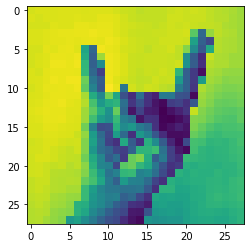

In [159]:
from PIL import Image

img = Image.open('sign_test.png').convert('LA')
img = img.resize((28, 28))
img_arr = np.asarray(img)

sign = img_arr[:, :, 0]
plt.imshow(sign)

In [160]:
sign = sign.reshape(28, 28, 1)
sign = np.array([sign])
sign.shape

(1, 28, 28, 1)

In [161]:
pred = saved_model.predict(sign)

In [162]:
pred[0]

array([5.84357567e-02, 0.00000000e+00, 5.07150205e-31, 1.16127777e-21,
       6.26338090e-22, 1.59660430e-16, 8.13227770e-35, 1.85692581e-04,
       1.49606075e-03, 1.04333416e-17, 1.00157727e-20, 9.87335532e-23,
       9.63823550e-05, 5.35219013e-28, 1.09081358e-17, 1.10882269e-20,
       1.52432792e-23, 1.72005489e-03, 7.32218774e-22, 0.00000000e+00,
       6.56383367e-17, 2.61761014e-20, 6.59001766e-27, 9.38065946e-01],
      dtype=float32)

In [163]:
np.argmax(pred[0])

23

In [164]:
len(pred[0])

24